In [1]:
from IPython.display import Image
Image(url='https://vesg.ipsl.upmc.fr/thredds/fileServer/IPSLFS/jservon/CliMAF_Notebooks_html/CliMAF-logo-small.png') 

### A science-oriented framework to ease the analysis of climate model simulations
##### WP5 ANR Convergence
##### Project leaders: Stéphane Sénési (CNRM-GAME), Jérôme Servonnat (LSCE-IPSL)
##### Developers: Ludivine Vignon (CNRM-GAME), Laurent Franchisteguy (CNRM-GAME), Patrick Brockmann (LSCE-IPSL), Sylvana Ramos-Buarque (CNRM-GAME)
##### Beta-testing: Olivier Marti (LSCE-IPSL), Marie-Pierre Moine (CERFACS), Emilia Sanchez-Gomez (CERFACS)
##### Contributors: you!
##   
##### contact: climaf@meteo.fr

The goals of CliMAF are to provide the scientists with simplified and science-oriented means for :
- accessing both model and references data
- pre-tretament (period and geographical selections, regridding, averaging like seasonal mean computations...)
- plotting  maps, cross-sections and time series
- building  atlases
- plugging personal scripts in an atlas or in an analysis workflow
- sharing such scripts
- handlling ensembles (multi-model, multi-realization)
CliMAF provides full managment of the outputs by handling the naming of the output files; it also stores the information on "how I obtained this file" under the form of an expression called CRS (CliMAF Reference Syntax) that allows checking for the existing files and avoid recomputing the same files twice (or more).

#  
#   

# Adding access to my own data

In this notebook you will see how we:
- 1. go from a path/filename to a CliMAF ds() request: create my own CliMAF project in 3 lines, and benefit from the period, variable and geographical region selection provided by ds(); also take this as an opportunity to acces your data with keywords!
    - add variable and frequency names aliases
    - define default values
- 2. access a file without having to declare a project: very useful to access, for instance, an isolated grid file

#  

## First, import climaf

In [1]:
from climaf.api import *

('LC debug :', False)
CliMAF install => /ciclad-home/jservon/Evaluation/CliMAF/climaf_installs/climaf_gr_V1.2.13
python => /prodigfs/ipslfs/dods/jservon/miniconda/envs/analyse_env_2.7/bin/python
---
Required softwares to run CliMAF => you are using the following versions/installations:


CliMAF version = 1.2.13


ncl 6.6.2 => /prodigfs/ipslfs/dods/jservon/miniconda/envs/analyse_env_2.7/bin/ncl
cdo 1.9.6 => /opt/nco/1.9/bin/cdo
nco (ncks) 4.5.2 => /opt/nco-4.5.2/bin/ncks
ncdump fichier => /prodigfs/ipslfs/dods/jservon/miniconda/envs/analyse_env_2.7/bin/ncdump
---


Cache directory set to : /data/jservon/climafcache (use $CLIMAF_CACHE if set) 
Cache directory for remote data set to : /data/jservon/climafcache/remote_data (use $CLIMAF_REMOTE_CACHE if set) 
Available macros read from ~/.climaf.macros are : []


### And set verbosity ('critical' -> minimum ; 'debug' -> maximum)

In [2]:
clog('critical') # min verbosity = critical < warning < info < debug = max verbosity

### ... and dont' forget to open the documentation in case you have questions.
### http://climaf.readthedocs.org/
### -> Use the "Quick search" space to search for what you are interested in, it is really powerfull!
###  

## 1. How to add access to my own data archive

We start by picking up a typical example of a path filename of the archive

Here we will use the ERAI archive on Climserv to illustrate.


In [3]:
# Here is the path/filename
!ls /bdd/ERAI/NETCDF/GLOBAL_075/1xmonthly/AN_SF/1981/

al.1981.asmei.GLOBAL_075.nc	stl2.1981.asmei.GLOBAL_075.nc
ci.1981.asmei.GLOBAL_075.nc	stl3.1981.asmei.GLOBAL_075.nc
d2.1981.asmei.GLOBAL_075.nc	stl4.1981.asmei.GLOBAL_075.nc
geopt.1981.asmei.GLOBAL_075.nc	swvl1.1981.asmei.GLOBAL_075.nc
hcc.1981.asmei.GLOBAL_075.nc	swvl2.1981.asmei.GLOBAL_075.nc
lcc.1981.asmei.GLOBAL_075.nc	swvl3.1981.asmei.GLOBAL_075.nc
lsm.1981.asmei.GLOBAL_075.nc	swvl4.1981.asmei.GLOBAL_075.nc
mcc.1981.asmei.GLOBAL_075.nc	t2.1981.asmei.GLOBAL_075.nc
msl.1981.asmei.GLOBAL_075.nc	tcc.1981.asmei.GLOBAL_075.nc
sd.1981.asmei.GLOBAL_075.nc	tcwv.1981.asmei.GLOBAL_075.nc
skt.1981.asmei.GLOBAL_075.nc	u10.1981.asmei.GLOBAL_075.nc
sstk.1981.asmei.GLOBAL_075.nc	v10.1981.asmei.GLOBAL_075.nc
stl1.1981.asmei.GLOBAL_075.nc


### Then, insert keywords in the pattern:
- variable, frequency, PERIOD, model, simulation or realization => those keywords are often used in big tools to identify the datasets
- grid, product, model_version, bias_correction are examples of custom keywords that will help you identify your datasets in your own archive

In [4]:
# -- Insert your keywords in the pattern
pattern='/bdd/ERAI/NETCDF/${grid}/${frequency}/AN_SF/*/${variable}.${PERIOD}.asmei.${grid}.nc'


### Next step is to specify that your project takes those arguments: we use cproject (https://climaf.readthedocs.io/en/master/functions_data.html?highlight=cproject)

Note!
=> variable, PERIOD, domain and simulation are declared by default (no need to add them)

In [5]:
# -- Declare the project
cproject('ClimServ_ERAI','grid','frequency', separator='%')

${project}%${simulation}%${variable}%${period}%${domain}%${grid}%${frequency}

### Finally, tell CliMAF that this project follows the pathfilename pattern 'pattern':
### -> dataloc: https://climaf.readthedocs.io/en/master/functions_data.html?highlight=dataloc#dataloc-describe-data-locations-for-a-series-of-simulations

In [6]:
# -- Tell CliMAF that this project follows the pathfilename pattern 'pattern'
dataloc(project='ClimServ_ERAI', url=pattern)

<climaf.dataloc.dataloc instance at 0x2ae2a8ce8d40>

### Test your new CliMAF project using ds():

In [7]:
# -- Test if it works with ds()
test = ds(project='ClimServ_ERAI', variable='t2', period='1980-1985', grid='GLOBAL_075', frequency='1xmonthly')
summary(test)
#cfile(test)

/bdd/ERAI/NETCDF/GLOBAL_075/1xmonthly/AN_SF/1980/t2.1980.asmei.GLOBAL_075.nc
/bdd/ERAI/NETCDF/GLOBAL_075/1xmonthly/AN_SF/1981/t2.1981.asmei.GLOBAL_075.nc
/bdd/ERAI/NETCDF/GLOBAL_075/1xmonthly/AN_SF/1982/t2.1982.asmei.GLOBAL_075.nc
/bdd/ERAI/NETCDF/GLOBAL_075/1xmonthly/AN_SF/1983/t2.1983.asmei.GLOBAL_075.nc
/bdd/ERAI/NETCDF/GLOBAL_075/1xmonthly/AN_SF/1984/t2.1984.asmei.GLOBAL_075.nc
/bdd/ERAI/NETCDF/GLOBAL_075/1xmonthly/AN_SF/1985/t2.1985.asmei.GLOBAL_075.nc


{'domain': 'global',
 'frequency': '1xmonthly',
 'grid': 'GLOBAL_075',
 'period': 1980-1985,
 'project': 'ClimServ_ERAI',
 'simulation': '',
 'variable': 't2'}

In [9]:
ncdump(test)

netcdf \5 {
dimensions:
	lon = 480 ;
	lat = 241 ;
	time = UNLIMITED ; // (72 currently)
variables:
	double lon(lon) ;
		lon:standard_name = "longitude" ;
		lon:long_name = "Longitude" ;
		lon:units = "degrees_east" ;
		lon:axis = "X" ;
	double lat(lat) ;
		lat:standard_name = "latitude" ;
		lat:long_name = "Latitude" ;
		lat:units = "degrees_north" ;
		lat:axis = "Y" ;
	double time(time) ;
		time:standard_name = "time" ;
		time:long_name = "Time" ;
		time:units = "hours since 1957-01-01 00:00:00" ;
		time:calendar = "standard" ;
	float t2(time, lat, lon) ;
		t2:long_name = "2 metre temperature" ;
		t2:units = "degK" ;
		t2:num_GRIB = 167 ;
		t2:level_desc = "Surface" ;
		t2:dataset = "Analysis" ;
		t2:actual_range = 205.442f, 313.285f ;

// global attributes:
		:CDI = "Climate Data Interface version 1.6.8 (http://mpimet.mpg.de/cdi)" ;
		:Conventions = "CF-1.0" ;
		:history = "Fri Nov 16 16:15:29 2018: cdo -O -seldate,1980-01-01T00:00:00,1985-12-31T23:59:00 -selname,t2 -mergetime /bdd/E

ncdump(ds('ClimServ_ERAI%%t2%1980-1985%global%GLOBAL_075%1xmonthly'))

### And test a quick plot to see if your input data is correctly handled by the plot script (issues come from the dimensions attributes)

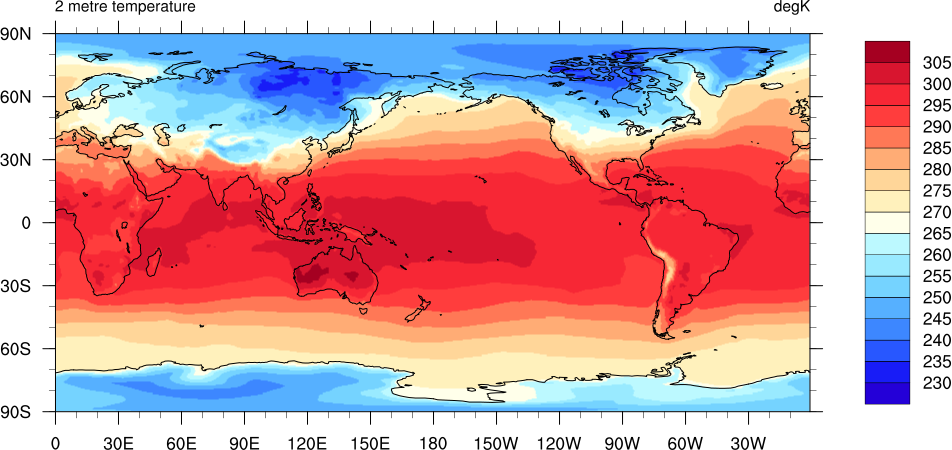

In [8]:
implot(test)

### You can now use your data from CliMAF and benefit from the smart period, variable and geographical region selection provided by ds()!
#   
#   
#   

### Let's say that now you would like to access your data with standard variable and frequency names, and specify a default value
### To do this, we will use calias() and cfreqs:
- calias: https://climaf.readthedocs.io/en/master/functions_data.html?highlight=calias#climaf.classes.calias

- cfreqs: https://climaf.readthedocs.io/en/master/functions_data.html?highlight=cfreqs#cfreqs-declare-non-standard-frequency-names-for-a-project

- cdef: https://climaf.readthedocs.io/en/master/functions_data.html?highlight=cdef#cdef-define-some-default-values-for-datasets-attributes

In [11]:
### Let's say that now you would like to access your data with standard variable and frequency names, and specify a default value
### To do this, we will use calias() and cfreqs:
### -> calias: https://climaf.readthedocs.io/en/master/functions_data.html?highlight=calias#climaf.classes.calias
### -> cfreqs: https://climaf.readthedocs.io/en/master/functions_data.html?highlight=cfreqs#cfreqs-declare-non-standard-frequency-names-for-a-project

# -- Alias for the variable name
#    -> when using the project 'ClimServ_ERAI', we can use 'tas' instead of 't2' 
calias('ClimServ_ERAI', 'tas', 't2')

# -- Alias for the frequence name
#    -> when using the project 'ClimServ_ERAI', we can use 'monthly' instead of '1xmonthly'
cfreqs('ClimServ_ERAI', {'monthly':'1xmonthly'})

# -- Default value for the grid
#    -> when using the project 'ClimServ_ERAI', the keyword 'grid' takes 'GLOBAL_075' as default value
cdef('grid','GLOBAL_075', project='ClimServ_ERAI')

### And a give it a try:

In [12]:
# We can now access the same files using the aliases
test2 = ds(project='ClimServ_ERAI', variable='tas', period='1980-1985', frequency='monthly')
summary(test2)

/bdd/ERAI/NETCDF/GLOBAL_075/1xmonthly/AN_SF/1980/t2.1980.asmei.GLOBAL_075.nc
/bdd/ERAI/NETCDF/GLOBAL_075/1xmonthly/AN_SF/1981/t2.1981.asmei.GLOBAL_075.nc
/bdd/ERAI/NETCDF/GLOBAL_075/1xmonthly/AN_SF/1982/t2.1982.asmei.GLOBAL_075.nc
/bdd/ERAI/NETCDF/GLOBAL_075/1xmonthly/AN_SF/1983/t2.1983.asmei.GLOBAL_075.nc
/bdd/ERAI/NETCDF/GLOBAL_075/1xmonthly/AN_SF/1984/t2.1984.asmei.GLOBAL_075.nc
/bdd/ERAI/NETCDF/GLOBAL_075/1xmonthly/AN_SF/1985/t2.1985.asmei.GLOBAL_075.nc


{'domain': 'global',
 'frequency': 'monthly',
 'grid': 'GLOBAL_075',
 'period': 1980-1985,
 'project': 'ClimServ_ERAI',
 'simulation': '',
 'variable': 'tas'}

### Some precisions on dataloc:
- if you give a list of patterns to url, CliMAF will scan the consecutive patterns and stop searching when it finds the first matching result
- if you want to scan multiple patterns (even if CliMAF found something matching the first one), make successive calls to dataloc()

### Consequence of this!!
- If you have two archives covering joint periods (no overlap in time), you can access both at once from one project
- This is particularly interesting in CMIP5, when you want to extend your historical run with a bit of scenario

### => CMIP5_extent and CORDEX_extent

### Here is how we declare the CMIP5_extent project

In [13]:
## -- Declare a CMIP5 'extent' CliMAF project = extracts a period covering historical and a scenario
## ------------------------------------ >
cproject('CMIP5_extent', 'root', 'model', 'table', 'experiment', 'extent_experiment', 'realization', 'frequency', 'realm',
       'version', ensemble=['model','realization'],separator='%')

## -- Define the pattern for CMIP5 => will mainly be used to get the historical run
pattern1='${root}/CMIP5/output/*/${model}/${experiment}/${frequency}/${realm}/${table}/${realization}/${version}/${variable}/'
pattern1+='${variable}_${table}_${model}_${experiment}_${realization}_${PERIOD}.nc'
## -- And the additionnal pattern for extent => target a scenario (typically rcp85)
pattern2='${root}/CMIP5/output/*/${model}/${extent_experiment}/${frequency}/${realm}/${table}/${realization}/${version}/${variable}/'
pattern2+='${variable}_${table}_${model}_${extent_experiment}_${realization}_${PERIOD}.nc'
## -- CMIP5_extent
dataloc(project='CMIP5_extent', url=pattern1)
dataloc(project='CMIP5_extent', url=pattern2)

# -- Default values
root="/prodigfs/project"
cdef('root'        , root          , project='CMIP5_extent')
cdef('table'       , '*'           , project='CMIP5_extent') # impossible, because of ambiguities
cdef('realm'      , '*'           , project='CMIP5_extent')
cdef('realization' , 'r1i1p1'      , project='CMIP5_extent')
cdef('experiment'  , 'historical'   , project='CMIP5_extent')
cdef('extent_experiment'  , 'rcp85'   , project='CMIP5_extent')
cdef('version'     , 'latest'       , project='CMIP5_extent')
cdef('frequency'   , '*'            , project='CMIP5_extent')

# -- Frequency names aliases
cfreqs('CMIP5_extent', {'daily':'day', 'monthly':'mon', 'yearly':'yr'})

## You can check now that, when asking for a period overlapping both the historical and scenario, CliMAF will be able to get the first part from the historical run and the extent from the scenario

In [14]:
test = ds(project='CMIP5_extent', period='1990-2010', variable='tas', model='*', table='Amon')
summary(test.explore('ensemble'))

Keys - values:
{'domain': 'global', 'realm': 'atmos', 'version': 'latest', 'period': 1990-2010, 'simulation': '', 'project': 'CMIP5_extent', 'experiment': 'historical', 'frequency': 'mon', 'realization': 'r1i1p1', 'variable': 'tas', 'table': 'Amon', 'model': 'ACCESS1-0', 'root': '/prodigfs/project', 'extent_experiment': 'rcp85'}
-- Ensemble members:
ACCESS1-0
/prodigfs/project/CMIP5/output/CSIRO-BOM/ACCESS1-0/historical/mon/atmos/Amon/r1i1p1/latest/tas/tas_Amon_ACCESS1-0_historical_r1i1p1_185001-200512.nc
/prodigfs/project/CMIP5/output/CSIRO-BOM/ACCESS1-0/rcp85/mon/atmos/Amon/r1i1p1/latest/tas/tas_Amon_ACCESS1-0_rcp85_r1i1p1_200601-210012.nc
--
ACCESS1-3
/prodigfs/project/CMIP5/output/CSIRO-BOM/ACCESS1-3/historical/mon/atmos/Amon/r1i1p1/latest/tas/tas_Amon_ACCESS1-3_historical_r1i1p1_185001-200512.nc
/prodigfs/project/CMIP5/output/CSIRO-BOM/ACCESS1-3/rcp85/mon/atmos/Amon/r1i1p1/latest/tas/tas_Amon_ACCESS1-3_rcp85_r1i1p1_200601-210012.nc
--
CESM1-CAM5-1-FV2
/prodigfs/project/CMIP5/outpu

/prodigfs/project/CMIP5/output/NASA-GISS/GISS-E2-H/historical/mon/atmos/Amon/r1i1p1/latest/tas/tas_Amon_GISS-E2-H_historical_r1i1p1_195101-200512.nc
/prodigfs/project/CMIP5/output/NASA-GISS/GISS-E2-H/rcp85/mon/atmos/Amon/r1i1p1/latest/tas/tas_Amon_GISS-E2-H_rcp85_r1i1p1_200601-205012.nc
--
MIROC-ESM-CHEM
/prodigfs/project/CMIP5/output/MIROC/MIROC-ESM-CHEM/historical/mon/atmos/Amon/r1i1p1/latest/tas/tas_Amon_MIROC-ESM-CHEM_historical_r1i1p1_185001-200512.nc
/prodigfs/project/CMIP5/output/MIROC/MIROC-ESM-CHEM/rcp85/mon/atmos/Amon/r1i1p1/latest/tas/tas_Amon_MIROC-ESM-CHEM_rcp85_r1i1p1_200601-210012.nc
--
MRI-ESM1
/prodigfs/project/CMIP5/output/MRI/MRI-ESM1/historical/mon/atmos/Amon/r1i1p1/latest/tas/tas_Amon_MRI-ESM1_historical_r1i1p1_185101-200512.nc
/prodigfs/project/CMIP5/output/MRI/MRI-ESM1/rcp85/mon/atmos/Amon/r1i1p1/latest/tas/tas_Amon_MRI-ESM1_rcp85_r1i1p1_200601-210012.nc
--
NorESM1-ME
/prodigfs/project/CMIP5/output/NCC/NorESM1-ME/historical/mon/atmos/Amon/r1i1p1/latest/tas/tas_Am

#  

## 2. Access an isolated file

### First method: use fds()
https://climaf.readthedocs.io/en/master/functions_data.html?highlight=cdef#fds-define-a-dataset-from-a-data-file
#### fds() is the simplest way to create a CliMAF dataset. It can be very useful to access a grid or mask file.

In [24]:
# --> Set period='fx' if you are working with a climatology, i.e. there is no time dimension in the file
# Example with fds()
test = fds('/bdd/ERAI/NETCDF/GLOBAL_075/1xmonthly/AN_SF/1980/t2.1980.asmei.GLOBAL_075.nc',
           variable='t2', period='198001-198012')
cfile(test)

'/prodigfs/ipslfs/dods/jservon/climafcache_test/b6ea0/75ca3/644f7/e1159/85bb0/3479e/c7edb/72b1b/c0f7a/71350/59ca4/f.nc'

### Second method: make a 'non-optimal use of ds()' : no keyword in the pattern

In [25]:
# -- Can be very useful if you developed tools that make use of ds (and not fds())

# --> Insert 
pattern = '/bdd/ERAI/NETCDF/GLOBAL_075/1xmonthly/AN_SF/1980/t2.1980.asmei.GLOBAL_075.nc'
cproject('my_trivial_project')
dataloc(project='my_trivial_project', url=pattern) 


test = ds(project='my_trivial_project', variable='t2', period='1980')
summary(test)

/bdd/ERAI/NETCDF/GLOBAL_075/1xmonthly/AN_SF/1980/t2.1980.asmei.GLOBAL_075.nc


{'domain': 'global',
 'period': 1980,
 'project': 'my_trivial_project',
 'simulation': '',
 'variable': 't2'}

## This was how to access your own data in CliMAF!
##  
##  
## -> go back to the other examples to see more on CliMAF
##  